<h1>logistic regression without applying polynomin</h1>

do regularization with modal 'liblinear'

# <h4>accuracy: 0.9905121924252207</h4>

In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


In [2]:
dataPath = '../../preprocess_data_set/newsData_ratio8_2.csv'

df_train = pd.read_csv(dataPath)
df_train.shape

(26771, 251)

In [3]:
# randomly shuffle the rows
df_train = df_train.sample(frac=1, random_state=42)

df_train = df_train.reset_index()

df_train = df_train.drop('index', axis=1)
df_train

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,target
0,19.657124,50.442482,20.871874,-54.531494,20.362791,28.577585,-1.906657,28.021065,-24.411823,-19.387388,...,-49.060287,-3.104522,27.967051,-30.539959,0.434239,36.554264,-1.757592,37.968136,-14.561114,0
1,73.660179,76.221085,-40.807030,-82.814301,28.292801,36.778252,-1.909100,49.479527,-79.806595,27.742567,...,-107.097870,-24.814592,-22.166080,3.848902,36.787331,59.989563,-6.423959,21.630405,-88.683472,0
2,-13.957203,50.162762,60.824032,-16.521429,-84.106873,33.965801,-24.306961,112.798645,-90.984291,-23.109505,...,-37.652954,39.876980,101.627777,-16.215570,-2.601095,74.666214,-34.334938,4.400374,-16.785315,1
3,34.285301,24.369213,37.394283,-56.808426,-13.195957,27.064581,-27.190607,45.300884,-38.357361,-21.576128,...,-37.443409,8.713444,20.008799,-13.551638,16.853464,48.484596,-13.077551,5.347030,-43.575981,0
4,8.285158,182.228394,3.545697,-74.310005,-46.353405,27.703939,-23.581633,136.181381,-75.572617,-49.096653,...,-108.719910,51.889614,156.074570,9.806570,61.040123,24.597773,-46.054447,-51.063011,-56.279831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,-71.454414,56.266552,-52.882614,-45.946815,-243.017334,76.435471,-80.246399,212.383789,-183.680710,-156.889847,...,-57.277454,78.127159,146.414536,-44.106407,59.677574,120.351700,-139.349457,35.773731,6.932467,1
26767,-0.284165,25.422646,2.497849,-8.947376,-36.106369,29.048079,-8.172162,28.610073,-23.188131,-27.730436,...,4.322698,22.755190,8.053110,2.871661,8.147329,12.612817,-6.104894,10.478649,2.183957,0
26768,71.339561,16.005495,51.056477,-179.901749,-14.259531,126.382141,-4.463017,42.901329,53.434349,-14.907699,...,-106.613243,-39.113091,48.542309,-67.660194,58.561333,206.557541,-90.538963,154.817764,-92.831696,0
26769,81.606827,-113.467224,-3.810923,-238.568436,70.856094,87.432976,53.989868,111.472473,-73.990349,42.114433,...,-40.093098,107.691345,-5.296010,-85.728683,78.135361,180.972107,-158.033691,8.803612,-97.057518,0


In [4]:
train_y = df_train['target']
train_x = df_train.drop(columns=['target'])

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=109) # 70% training and 30% test

robust_scaler = RobustScaler().fit(train_x.values)
trans_x = robust_scaler.transform(train_x.values)
# trans_test = robust_scaler.transform(test.values)

In [6]:
param_grid = {"C": [.01, .1, 1], "penalty": ('l1','l2')}
logisticClassifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter =300, penalty = 'l1')
grid_train = GridSearchCV(logisticClassifier, param_grid, cv = 5)
grid_train.fit(trans_x, train_y)

print('best_score: ', grid_train.best_score_)

best_score:  0.9913713003567757


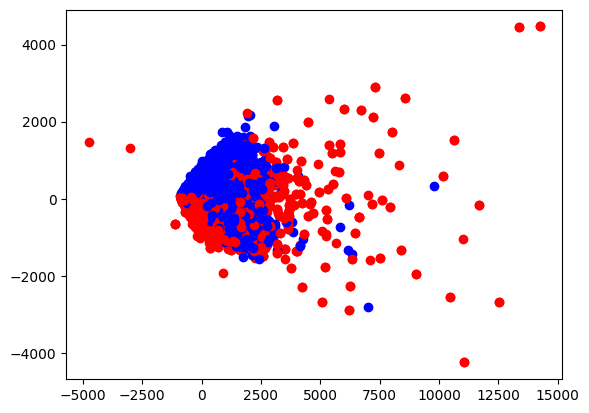

In [15]:
pca = PCA(n_components = 200)
pca.fit(train_x.values)
vals_2d = pca.transform(train_x.values)

colors = ['red' if t == 1 else 'blue' for t in train_y]
for i in range(len(vals_2d)):
    plt.scatter(x = vals_2d[i,0], y = vals_2d[i,1], color = colors[i])

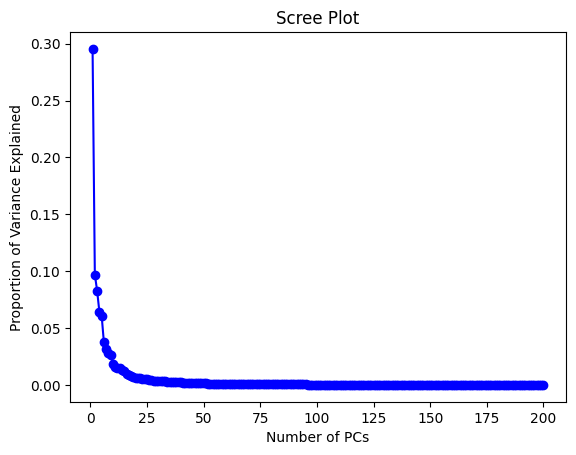

In [16]:
# Create a pipeline with PCA and logistic regression
pc_num = 200

pipe = Pipeline([
    ('pca', PCA(n_components = pc_num)), # choose number of components to keep
    ('clf', LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 1000, penalty = 'l1'))
])

pipe.fit(trans_x, train_y)

# Create a scree plot
plt.plot(np.arange(1, pipe['pca'].n_components_+1), pipe['pca'].explained_variance_ratio_, 'bo-')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

<h3>Real prediction on testing data</h3>

In [7]:
robust_scaler = RobustScaler().fit(X_train.values)
trans_x = robust_scaler.transform(X_train.values)
trans_test = robust_scaler.transform(X_test.values)

In [8]:
param_grid = {"C": [.01, .1], "penalty": ('l1','l2')}
logisticClassifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 300, penalty = 'l1')

# find best parameter with cross validation
grid_test = GridSearchCV(logisticClassifier, param_grid, cv=5)
grid_test.fit(trans_x, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=300,
                                          penalty='l1', solver='liblinear'),
             param_grid={'C': [0.01, 0.1], 'penalty': ('l1', 'l2')})

In [9]:
print("Average performance of the model: {:.3f}".format(grid_test.best_score_))

Average performance of the model: 0.987


In [10]:
grid_test.cv_results_

{'mean_fit_time': array([0.45087833, 1.07233162, 1.09693217, 1.44839644]),
 'std_fit_time': array([0.06006888, 0.07703614, 0.17535798, 0.04086952]),
 'mean_score_time': array([0.00491543, 0.00222692, 0.00201807, 0.00203333]),
 'std_score_time': array([0.00195581, 0.00312757, 0.00309938, 0.0030988 ]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penalty': 'l1'},
  {'C': 0.01, 'penalty': 'l2'},
  {'C': 0.1, 'penalty': 'l1'},
  {'C': 0.1, 'penalty': 'l2'}],
 'split0_test_score': array([0.97065101, 0.98372465, 0.98719317, 0.9879936 ]),
 'split1_test_score': array([0.9703842 , 0.98105656, 0.98559232, 0.98612593]),
 'split2_test_score': array([0.96371398, 0.97892209, 0.98772679, 0.98986126]),
 'spli

In [11]:
result_df = pd.DataFrame(grid_test.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.450878,0.060069,0.004915,0.001956,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.970651,0.970384,0.963714,0.963981,0.969042,0.967554,0.003077,4
1,1.072332,0.077036,0.002227,0.003128,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.983725,0.981057,0.978922,0.976254,0.979183,0.979828,0.002478,3
2,1.096932,0.175358,0.002018,0.003099,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.987193,0.985592,0.987727,0.984525,0.983720,0.985752,0.001525,2
3,1.448396,0.040870,0.002033,0.003099,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.987994,0.986126,0.989861,0.985859,0.986122,0.987192,0.001538,1


In [12]:
y_pred = grid_test.predict(trans_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6416
           1       0.98      0.96      0.97      1616

    accuracy                           0.99      8032
   macro avg       0.99      0.98      0.98      8032
weighted avg       0.99      0.99      0.99      8032



K-fold

In [13]:


k_folds = KFold(n_splits = 5)
param_grid = {"C": [.01, .1], "penalty": ('l1','l2')}
logisticClassifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 300, penalty = 'l1')



In [14]:
scores = cross_val_score(logisticClassifier, train_x, train_y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.98823529 0.98972731 0.98935375 0.99010086 0.99047441]
Average CV Score:  0.9895783251664506


In [15]:
param_grid = {"C": [.01, .1], "penalty": ('l1','l2')}
logisticClassifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 300, penalty = 'l1')

# find best parameter with cross validation
grid_test = GridSearchCV(logisticClassifier, param_grid, cv=5)

scores = cross_val_score(grid_test, train_x, train_y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.98860878 0.99103474 0.99047441 0.99028764 0.9921554 ]
Average CV Score:  0.9905121924252207
